<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#EDA" data-toc-modified-id="EDA-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Fit-and-predict" data-toc-modified-id="Fit-and-predict-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Fit and predict</a></span><ul class="toc-item"><li><span><a href="#Get-X,-y" data-toc-modified-id="Get-X,-y-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Get X, y</a></span></li><li><span><a href="#Standardize-features" data-toc-modified-id="Standardize-features-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Standardize features</a></span></li><li><span><a href="#Add-1's-to-X" data-toc-modified-id="Add-1's-to-X-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Add 1's to X</a></span></li><li><span><a href="#Fit-data-including-outliers-using-simple-linear-regression." data-toc-modified-id="Fit-data-including-outliers-using-simple-linear-regression.-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Fit data including outliers using simple linear regression.</a></span></li><li><span><a href="#Plot-regression-plane" data-toc-modified-id="Plot-regression-plane-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Plot regression plane</a></span></li><li><span><a href="#Fit-data-ignoring-outliers" data-toc-modified-id="Fit-data-ignoring-outliers-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Fit data ignoring outliers</a></span></li><li><span><a href="#Plot-regression-plane-without-outlier" data-toc-modified-id="Plot-regression-plane-without-outlier-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Plot regression plane without outlier</a></span></li></ul></li></ul></div>

* <span style = "font-size:2em; line-height:1.5"> Task : Build a good regression model which explains column C by a function of  A and B.  </span>

# EDA

<span style = "font-size:1.5em; line-height:1.5">
First, let's take a look at data.
</span>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('q2_data.csv', header=None)

In [3]:
data.columns = ['a', 'b', 'c']
data.head()

,a,b,c
0,0.490,-0.18,11.50
1,-1.410,-1.23,11.80
2,0.943,4.51,-3.24
3,3.570,5.07,-23.90
4,-1.700,6.91,-22.10


<span style = "font-size:1.5em; line-height:1.5">
'a' and 'b' have quite different ranges, so it's better to standardize them before fitting to a regression model.
</span>

In [4]:
data.describe()

,a,b,c
count,300.000000,300.000000,300.000000
mean,2.317009,2.013115,-41.564919
std,5.695248,2.998680,581.251021
min,-8.860000,-2.890000,-10000.000000
25%,-1.940000,-0.606250,-23.375000
50%,0.468500,1.935000,-3.090000
75%,7.042500,4.697500,16.300000
max,20.600000,7.000000,202.000000


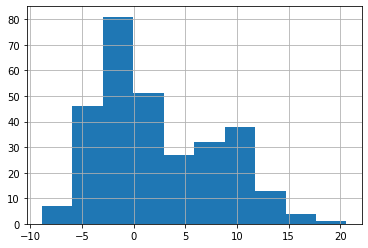

In [5]:
data['a'].hist()

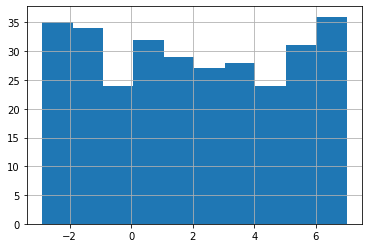

In [6]:
data['b'].hist()

<span style = "font-size:1.5em; line-height:1.5">
There seem to exist an outlier in the histogram and scatter plot.
</span>

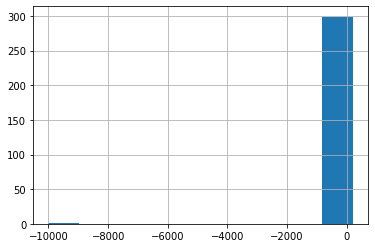

In [7]:
data['c'].hist()

Text(0, 0.5, 'c')

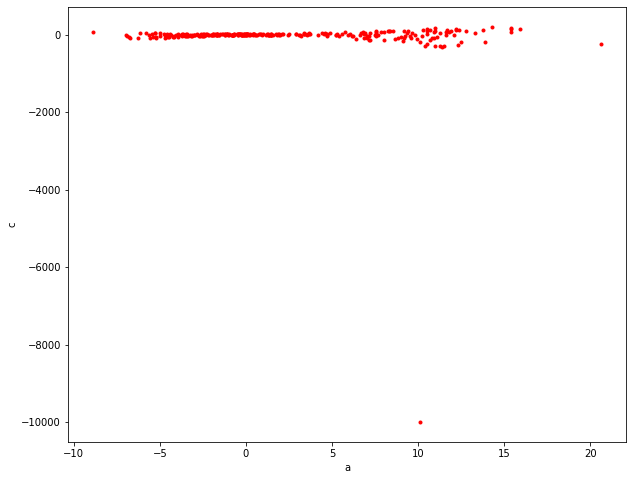

In [10]:
plt.figure(figsize=(10, 8))
plt.plot(data.a, data.c, '.', color='red')
plt.xlabel('a')
plt.ylabel('c')

# Fit and predict

## Get X, y

<span style = "font-size:1.5em; line-height:1.5">
Make arrays of features and target for computation.
</span>

In [11]:
def get_arrays(data):
    X = np.array(data[['a', 'b']])
    y = np.array(data[['c']])
    return X, y

In [12]:
X, y = get_arrays(data)

## Standardize features

<span style = "font-size:1.5em; line-height:1.5">
Standardize features to get better prediction. Since 'a' and 'b' have pretty different scales, it's better to standardize them before fitting into regression model.
</span>

In [13]:
def standardize(x):
    x = (x - np.mean(x))/np.std(x)
    return x

In [14]:
X = standardize(X)

## Add 1's to X

<span style = "font-size:1.5em; line-height:1.5">
Add a column of 1's to X for computing intercept.
</span>

In [15]:
def add_ones(X):
    ones = np.ones((len(X), 1))
    X = np.c_[ones, X]
    return X

In [16]:
X = add_ones(X)

## Fit data including outliers using simple linear regression.

<span style = "font-size:1.5em; line-height:1.5">
This time, we'll fit data including the outlier, and we'll use a simple linear regression model.
</span>

In [18]:
def get_coefficients(X, y):
    b = np.linalg.inv(X.T@X)@X.T@y
    return b

In [19]:
b = get_coefficients(X, y)

In [20]:
def predict(X, b):
    return X@b

In [21]:
y_hat = predict(X, b)

In [27]:
def get_mse(y, y_hat):
    mse = np.mean((np.array(y - y_hat))**2)
    return np.round(mse, 2)

In [40]:
def get_mae(y, y_hat):
    mae = np.median(np.abs(np.array(y - y_hat)))
    return np.round(mae, 2)

<span style = "font-size:1.5em; line-height:1.5">
The mean squared error of this model is extremely high. It's because of the outlier.
</span>

In [41]:
MSE1 = get_mse(y, y_hat)
MSE1

334688.27

<span style = "font-size:1.5em; line-height:1.5">
The median absolute error of this model is 33. This means that the difference between true c's and predicted c's are roughly 33.
</span>

In [43]:
MAE1 = get_mae(y, y_hat)
MAE1

33.25

## Plot regression plane

<span style = "font-size:1.5em; line-height:1.5">
This is the data in 3D plot and you can play around with different angles.  

Because of the outlier, it's pretty hard to tell if the regression plane fits well to the data.
</span>

In [47]:
%matplotlib notebook

<IPython.core.display.Javascript object>


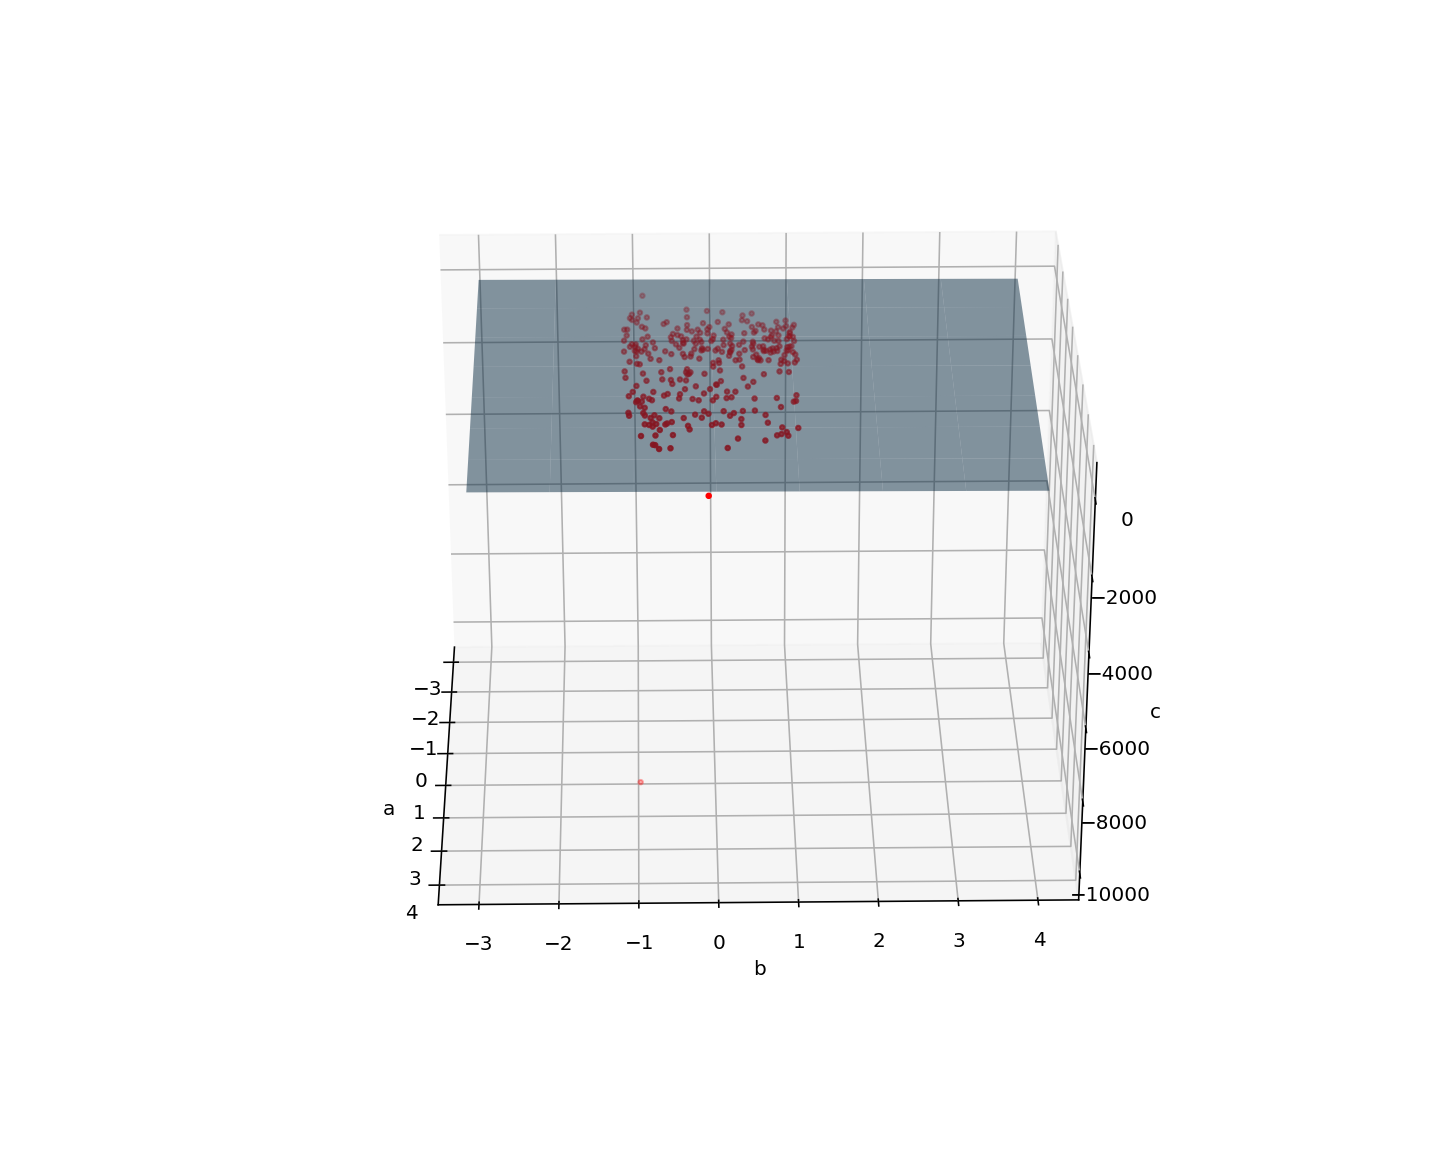

In [48]:
# code credit : https://gist.github.com/aricooperdavis/c658fc1c5d9bdc5b50ec94602328073b 

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 1], X[:, 2], y, marker='.', color='red')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')

xs = np.tile(np.arange(-3, 5), (8, 1))
ys = np.tile(np.arange(-3, 5), (8, 1)).T
zs = xs*b[1]+ys*b[2]+b[0]

ax.plot_surface(xs, ys, zs, alpha=0.5)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

## Fit data ignoring outliers

<span style = "font-size:1.5em; line-height:1.5">
The range of c is from -10000 to 202. To get a better model, we'll ignore the outlier this time.
</span>

In [49]:
data.c.describe()

count      300.000000
mean       -41.564919
std        581.251021
min     -10000.000000
25%        -23.375000
50%         -3.090000
75%         16.300000
max        202.000000
Name: c, dtype: float64

<span style = "font-size:1.5em; line-height:1.5">
Ignore the datapoint with c=-10000.
</span>

In [50]:
data1 = data.loc[data.c>-10000]

<span style = "font-size:1.5em; line-height:1.5">
The range of c has decreased to '-315~202' after removing the outlier.
</span>

In [52]:
data1.c.describe()

count    299.000000
mean      -8.259116
std       71.321872
min     -315.000000
25%      -23.100000
50%       -2.940000
75%       16.300000
max      202.000000
Name: c, dtype: float64

In [53]:
X, y = get_arrays(data1)

In [54]:
X = standardize(X)

In [55]:
X = add_ones(X)

In [56]:
b = get_coefficients(X, y)

In [57]:
y_hat = predict(X, b)

In [58]:
MSE2 = get_mse(y, y_hat)
MSE2

3072.18

In [60]:
MAE2 = get_mae(y, y_hat)
MAE2

30.55

<span style = "font-size:1.5em; line-height:1.5">
After ignoring the outlier, MSE has dramatically decreased. MAE hasn't decreased as much as MSE because MAE is more robust to outliers. However, it's clear that ignoring the outlier has improved the model judging by MSE and MAE.
</span>

In [59]:
MSE1, MSE2

(334688.27, 3072.18)

In [61]:
MAE1, MAE2

(33.25, 30.55)

## Plot regression plane without outlier

<span style = "font-size:1.5em; line-height:1.5">
After ignoring the outlier, the regression plane seems to fit relatively well to the data.

In [ ]:
# code credit : https://gist.github.com/aricooperdavis/c658fc1c5d9bdc5b50ec94602328073b 

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter3D(X[:, 1], X[:, 2], y, marker='.', color='red')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('c')

xs = np.tile(np.arange(-3, 5), (8, 1))
ys = np.tile(np.arange(-3, 5), (8, 1)).T
zs = xs*b[1]+ys*b[2]+b[0]

ax.plot_surface(xs, ys, zs, alpha=0.5)

for angle in range(0, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)